In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
std = pd.read_csv('std_mlb.csv')
adv = pd.read_csv('adv_mlb.csv')

In [3]:
# ERAvXERA = std[['Team','Name','ERA','xERA']]
# ERAvXERA['diff'] = ERAvXERA['ERA'] - ERAvXERA['xERA']
# ERAvXERA.groupby('Team').mean()

In [4]:
# FIPvXFIP = adv[['Team','Name','FIP-','xFIP-']]
# FIPvXFIP['diff'] = FIPvXFIP['FIP-'] - FIPvXFIP['xFIP-']
# FIPvXFIP.groupby('Team').mean().to_csv('FIP_vs_xFIP.csv')

In [5]:
baseball = pd.merge(std,adv,how = 'inner',on=['Name','playerid'])

In [6]:
baseball[['W','L','SV','G','GS']] = baseball[['W','L','SV','G','GS']].astype(int)

In [7]:
baseball[['LOB%_x','GB%','HR/FB','K%','BB%','K-BB%']] = baseball[['LOB%_x','GB%','HR/FB','K%','BB%','K-BB%']].replace('[\%,]', '', regex=True).astype(float)

In [8]:
baseball = baseball.drop(baseball.columns[baseball.columns.str.contains('_[y]')],axis=1)

In [9]:
baseball.columns

Index(['Name', 'Team_x', 'W', 'L', 'SV', 'G', 'GS', 'IP', 'K/9_x', 'BB/9_x',
       'HR/9_x', 'BABIP_x', 'LOB%_x', 'GB%', 'HR/FB', 'vFA (pi)', 'ERA_x',
       'xERA', 'FIP_x', 'xFIP_x', 'WAR', 'playerid', 'K/BB', 'K%', 'BB%',
       'K-BB%', 'AVG', 'WHIP', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'SIERA'],
      dtype='object')

In [10]:
baseball.rename(columns = {'K/9_x':'K/9','Team_x':'Team','BB/9_x':'BB/9','HR/9_x':'HR/9','BABIP_x':'BABIP','LOB%_x':'LOB%','ERA_x':'ERA','FIP_x':'FIP','xFIP_x':'xFIP'},inplace = True)

In [11]:
baseball.columns

Index(['Name', 'Team', 'W', 'L', 'SV', 'G', 'GS', 'IP', 'K/9', 'BB/9', 'HR/9',
       'BABIP', 'LOB%', 'GB%', 'HR/FB', 'vFA (pi)', 'ERA', 'xERA', 'FIP',
       'xFIP', 'WAR', 'playerid', 'K/BB', 'K%', 'BB%', 'K-BB%', 'AVG', 'WHIP',
       'ERA-', 'FIP-', 'xFIP-', 'E-F', 'SIERA'],
      dtype='object')

In [12]:
baseball = baseball.drop(['xERA','SV','G'],axis=1)

In [13]:
baseball['WIN%'] = baseball['W'] / (baseball['W'] + baseball['L'])
baseball = baseball.drop(['W','L'],axis=1)

In [14]:
baseball = baseball.fillna(0)
baseball.isna().sum()

Name        0
Team        0
GS          0
IP          0
K/9         0
BB/9        0
HR/9        0
BABIP       0
LOB%        0
GB%         0
HR/FB       0
vFA (pi)    0
ERA         0
FIP         0
xFIP        0
WAR         0
playerid    0
K/BB        0
K%          0
BB%         0
K-BB%       0
AVG         0
WHIP        0
ERA-        0
FIP-        0
xFIP-       0
E-F         0
SIERA       0
WIN%        0
dtype: int64

In [15]:
baseball.corr()['ERA-']

GS         -0.190252
IP         -0.476180
K/9        -0.144461
BB/9        0.445664
HR/9        0.700000
BABIP       0.609750
LOB%       -0.725463
GB%        -0.158923
HR/FB       0.608187
vFA (pi)   -0.038043
ERA         0.997026
FIP         0.753731
xFIP        0.507743
WAR        -0.709491
playerid   -0.040581
K/BB       -0.296959
K%         -0.384402
BB%         0.318477
K-BB%      -0.472284
AVG         0.787075
WHIP        0.880555
ERA-        1.000000
FIP-        0.751264
xFIP-       0.507647
E-F         0.640151
SIERA       0.498655
WIN%       -0.594398
Name: ERA-, dtype: float64

In [16]:
baseball = baseball.drop(['ERA','SIERA','E-F','xFIP-','FIP-','xFIP','FIP','K/9'],axis=1)

In [17]:
baseball

,Name,Team,GS,IP,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,...,WAR,playerid,K/BB,K%,BB%,K-BB%,AVG,WHIP,ERA-,WIN%
0,Gerrit Cole,NYY,6,37.2,0.72,0.24,0.315,78.9,36.5,2.9,...,2.4,13125,20.67,44.3,2.1,42.1,0.176,0.72,36,0.800000
1,Jacob deGrom,NYM,5,35.0,1.03,0.51,0.241,87.2,38.3,7.7,...,2.1,10954,14.75,48.0,3.3,44.7,0.134,0.57,13,0.500000
2,Corbin Burnes,MIL,5,29.1,0.00,0.31,0.273,73.9,53.6,5.3,...,1.8,19361,49.00,45.4,0.0,45.4,0.152,0.55,38,0.500000
3,Tyler Glasnow,TBR,6,37.2,2.63,0.48,0.230,84.6,40.8,6.1,...,1.7,14374,5.09,39.2,7.7,31.5,0.144,0.80,43,0.750000
4,Clayton Kershaw,LAD,6,38.2,1.16,0.70,0.262,81.2,49.0,8.1,...,1.4,2036,7.80,26.0,3.3,22.7,0.207,0.91,54,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Patrick Corbin,WSN,5,23.1,5.40,2.70,0.294,63.3,41.9,25.9,...,-0.5,9323,1.29,16.5,12.8,3.7,0.290,1.76,196,0.250000
149,Tarik Skubal,DET,4,16.1,6.06,3.86,0.196,75.6,17.0,21.9,...,-0.6,22267,1.18,16.9,14.3,2.6,0.242,1.65,174,0.000000
150,Drew Smyly,ATL,4,19.0,3.32,4.26,0.245,48.8,32.8,27.3,...,-0.6,11760,2.57,20.7,8.0,12.6,0.275,1.53,195,0.000000
151,Logan Allen,CLE,5,15.2,4.02,4.02,0.277,57.3,48.1,38.9,...,-0.6,18555,1.71,16.0,9.3,6.7,0.303,1.72,221,0.200000


In [18]:
baseball = baseball.drop(['GS','IP','vFA (pi)','AVG','playerid','K/BB','K%','BB%','BB/9','GB%','HR/FB'],axis=1)
team_pitching = baseball.groupby('Team').mean()
team_pitching

,HR/9,BABIP,LOB%,WAR,K-BB%,WHIP,ERA-,WIN%
Team,,,,,,,,
ARI,1.058333,0.289833,71.616667,0.300000,12.466667,1.296667,109.833333,0.572222
ATL,2.218333,0.316000,69.116667,0.116667,15.150000,1.556667,152.333333,0.388889
BAL,1.758000,0.307800,75.000000,0.240000,13.540000,1.438000,134.000000,0.450000
BOS,0.658000,0.303400,71.740000,0.540000,14.860000,1.284000,93.400000,0.600000
CHC,1.908000,0.304800,70.400000,-0.060000,11.200000,1.568000,152.800000,0.383333
CHW,0.892000,0.258200,76.780000,0.560000,19.080000,1.118000,76.000000,0.683333
CIN,1.416000,0.308400,76.320000,0.320000,15.460000,1.362000,101.800000,0.403333
CLE,2.056000,0.260600,71.200000,0.260000,15.740000,1.310000,129.400000,0.440000
COL,0.998000,0.281000,68.600000,0.320000,7.560000,1.416000,99.400000,0.316667


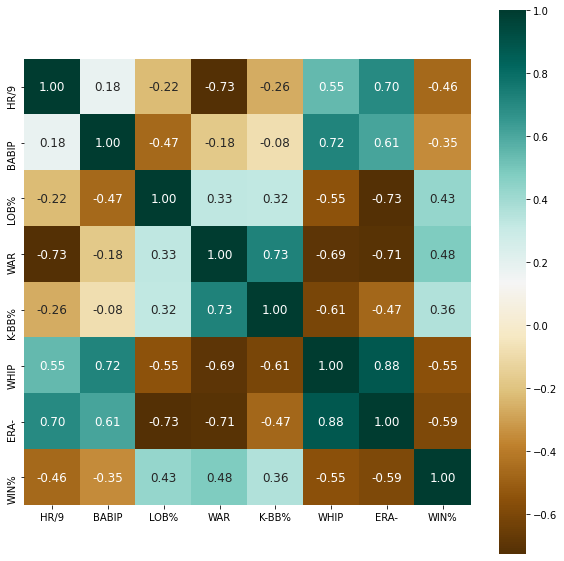

In [19]:
# baseball.to_csv('baseball.csv')
plt.figure(figsize = (10,10))
sns.heatmap(baseball.corr(),cmap = 'BrBG',annot=True, annot_kws={"size":12},square=True,fmt = ".2f")
plt.savefig('era_corr')

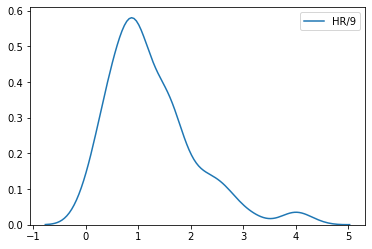

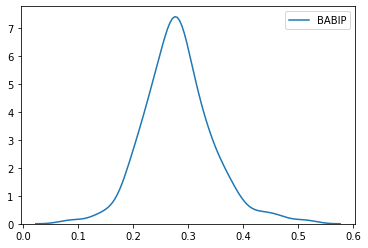

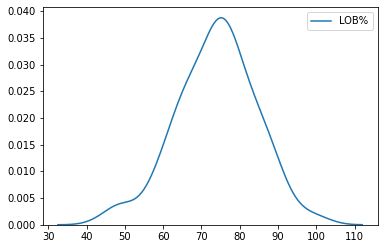

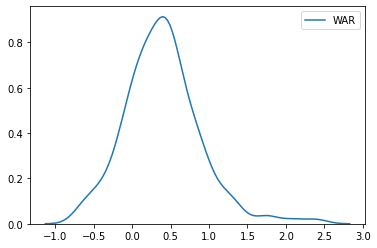

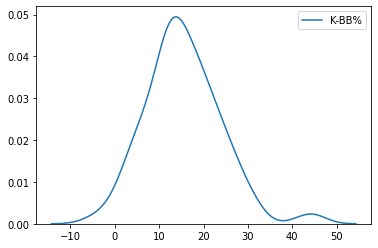

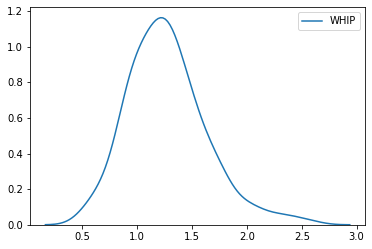

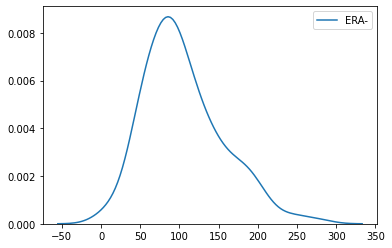

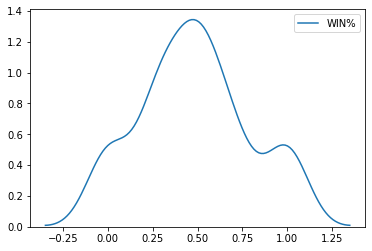

In [20]:
def plot_var_kde(col,df):
    sns.kdeplot(df[col])
for col in baseball.columns[2:]:
    plot_var_kde(col,baseball)
    plt.show()
plt.style.use('ggplot')

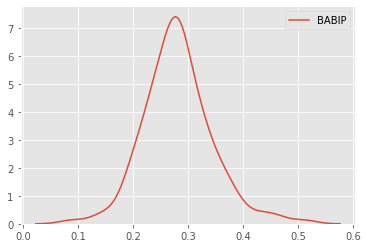

In [21]:
plot_var_kde('BABIP',baseball)
plt.savefig('ERA_BABIP')

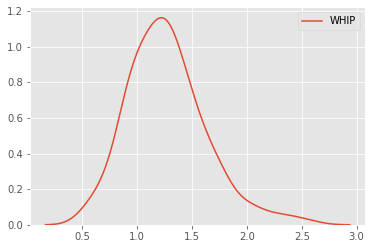

In [22]:
plot_var_kde('WHIP',baseball)
plt.savefig('ERA_WHIP')

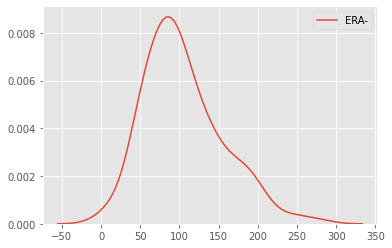

In [23]:
plot_var_kde('ERA-',baseball)
plt.savefig('ERA')